SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Album]\n(\n    [AlbumId] INTEGER  NOT NULL,\n    [Title] NVARCHAR(160)  NOT NULL,\n    [ArtistId] INTEGER  NOT NULL,\n    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),\n    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE INDEX [IFK_TrackAlbumId] ON [Track] ([AlbumId])\n\nCREATE TABLE [Track]\n(\n    [TrackId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(200)  NOT NULL,\n    [AlbumId] INTEGER,\n    [MediaTypeId] INTEGER  NOT NULL,\n    [GenreId] INTEGER,\n    [Composer] NVARCHAR(220),\n    [Milliseconds] INTEGER  NOT NULL,\n    [Bytes] INTEGER,\n    [UnitPrice] NUMERIC(10,2)  NOT NULL,\n    CONS

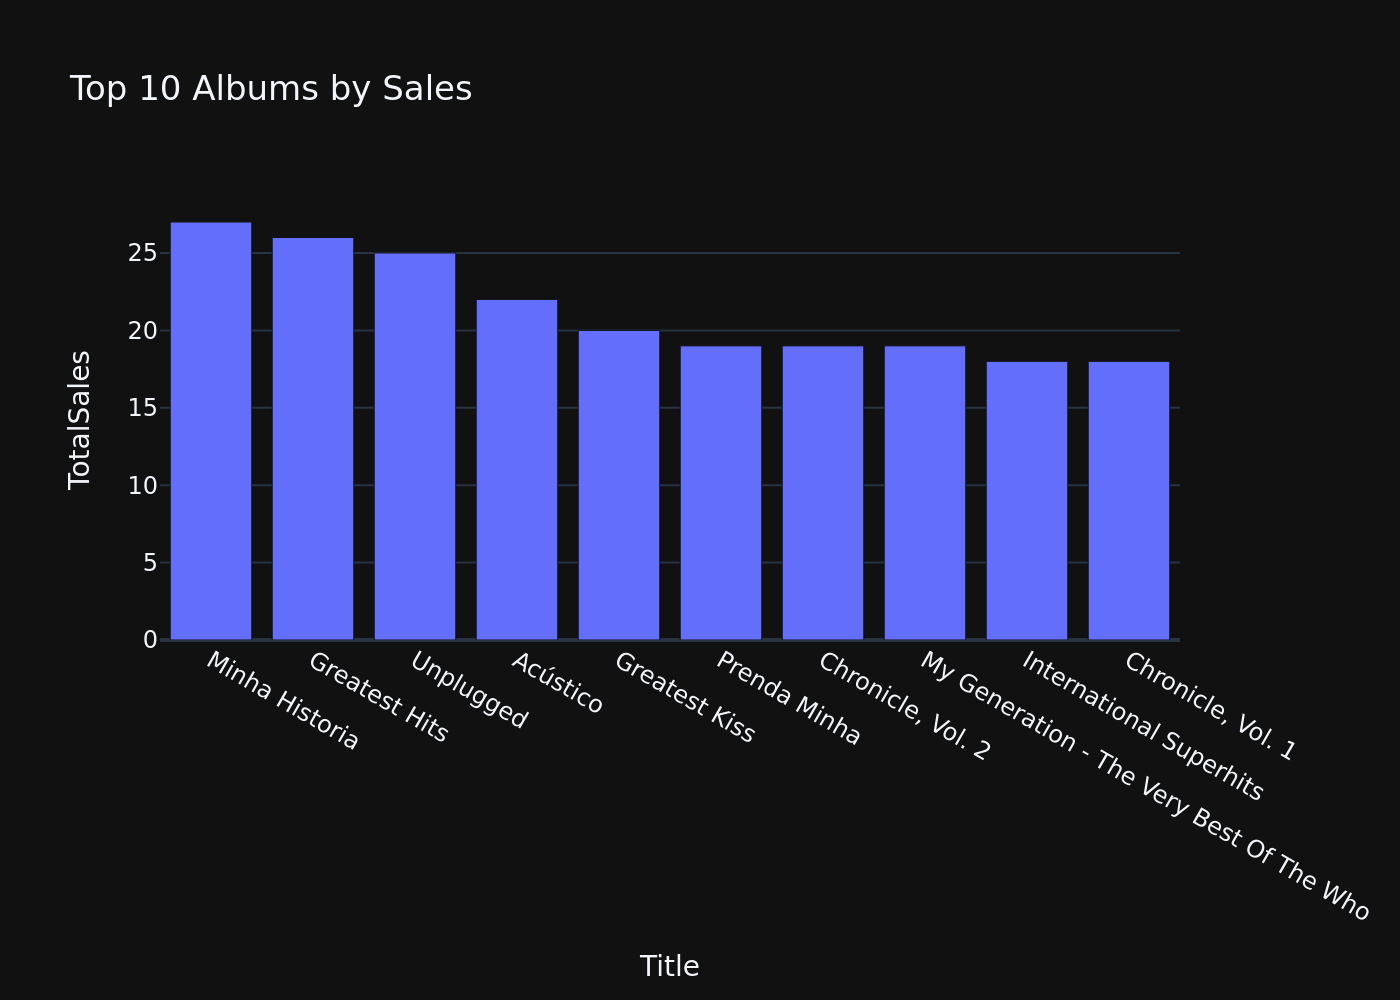

('SELECT a.AlbumId, a.Title, SUM(il.Quantity) AS TotalSales\nFROM Album a\nJOIN Track t ON a.AlbumId = t.AlbumId\nJOIN InvoiceLine il ON t.TrackId = il.TrackId\nGROUP BY a.AlbumId, a.Title\nORDER BY TotalSales DESC\nLIMIT 10;',
    AlbumId                                     Title  TotalSales
 0       23                            Minha Historia          27
 1      141                             Greatest Hits          26
 2       73                                 Unplugged          25
 3      224                                  Acústico          22
 4       37                             Greatest Kiss          20
 5       21                              Prenda Minha          19
 6       55                         Chronicle, Vol. 2          19
 7      221  My Generation - The Very Best Of The Who          19
 8       39                   International Superhits          18
 9       54                         Chronicle, Vol. 1          18,
 Figure({
     'data': [{'alignmentgroup': 'T

In [2]:
import vanna
from vanna.remote import VannaDefault
vn = VannaDefault(model='chinook', api_key=vanna.get_api_key('ajaykumarkv0317@gmail.com'))
vn.connect_to_sqlite('https://vanna.ai/Chinook.sqlite')
vn.ask("What are the top 10 albums by sales?")